# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

# JUST RUNNING THREE WHILE I TEST -- SET SIZE BACK TO 1500 BEFORE TURNING IN
# JUMPING UP TO 5 FOR CALCULATION PURPOSES
                                                    #SET BACK
lats = np.random.uniform(lat_range[0], lat_range[1], size=5)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

5
['nemuro', 'kawana waters', 'albany', 'taolanaro', 'belm']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Create the base url and query url that will be used for the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
query_url = base_url + city + "&appid=" + weather_api_key

In [13]:
# Perform a GET request
response = requests.get(query_url)

# Convert the response to a JSON
weather_data = response.json()

# To print in a more readable way, use json.dumps with indent and sort_keys
print(json.dumps(weather_data, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 52.3,
        "lon": 8.1333
    },
    "dt": 1612930973,
    "id": 2951175,
    "main": {
        "feels_like": 259.73,
        "humidity": 92,
        "pressure": 1009,
        "temp": 263.21,
        "temp_max": 263.71,
        "temp_min": 262.15
    },
    "name": "Belm",
    "sys": {
        "country": "DE",
        "id": 1269,
        "sunrise": 1612939969,
        "sunset": 1612974643,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 9000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 0.51
    }
}


In [14]:
# Print the city number and name while it is being processed
# JUST PRINTING NUMBER AND NAME FOR TEST NOW
city_num = weather_data["sys"]["id"]
city_name = weather_data["name"]
print(f"Currently processing {city_name}, ID Number:{city_num}")

Currently processing Belm, ID Number:1269


In [15]:
# Putting everything together into a for loop now to get API request to run the list of cities

# Generate lists that will store the cities data as the loop runs
# Lists developed based on what information the homework requests we gather
city_name_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []

# Printing the log of cities as they are being requested per homework instructions
print(f"Requesting weather information from {len(cities)} random cities around the world")
print("-----------------------------")


# Set up loop to make an api call on each city in the list and store it's value before moving to the next
for city in cities:    
    
    # Need try logic for cases where weather api does not have records for that city
    try:
        # Update the query url with a new city
        query_url = base_url + city + "&appid=" + weather_api_key
        # Perform a GET request
        response = requests.get(query_url)
        # Convert the response to a JSON
        weather_data = response.json()
        # print(json.dumps(weather_data, indent = 4, sort_keys = True))
   
        # Collect all weather information for that city
        city_num = weather_data["sys"]["id"]
        city_name_list.append(weather_data["name"])
        cloud_list.append(weather_data["clouds"]["all"])
        country_list.append(weather_data["sys"]["country"])
        date_list.append(weather_data["dt"])
        humidity_list.append(weather_data["main"]["humidity"])
        lat_list.append(weather_data["coord"]["lat"])
        lng_list.append(weather_data["coord"]["lon"])
        temp_list.append(weather_data['main']['temp_max'])
        wind_list.append(weather_data["wind"]["speed"])
    
        # Print that the city is currently being processed per homework instructions
        print(f"Currently processing {city}, ID Number:{city_num}")
    
    # If city data is not found then use this except command and continue to the next city
    except(KeyError, IndexError):
        print(f"Unfortunately unable to pull data for {city}, Skipping {city} for now")
        
print("-----------------------------")
print(f"Finished collecting weather information from {len(cities)} cities around the world")
    

Requesting weather information from 5 random cities around the world
-----------------------------
Currently processing nemuro, ID Number:7976
Unfortunately unable to pull data for kawana waters, Skipping kawana waters for now
Currently processing albany, ID Number:2037353
Unfortunately unable to pull data for taolanaro, Skipping taolanaro for now
Currently processing belm, ID Number:1269
-----------------------------
Finished collecting weather information from 5 cities around the world


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# Use pandas function pd.DataFrame to create a dataframe from the list information generated above
# I chose to re-arrange this order of the columns here to what I felt more logical
cities_weather_df = pd.DataFrame({"City": city_name_list,
                                  "Country": country_list,
                                  "Temperature": temp_list,
                                  "Date": date_list,
                                  "Humidity": humidity_list,
                                  "Cloud": cloud_list,
                                  "Wind Speed": wind_list,
                                  "Lat": lat_list,
                                  "Lng":lng_list                                  
                                })

# Display the dataframe
cities_weather_df

,City,Country,Temperature,Date,Humidity,Cloud,Wind Speed,Lat,Lng
0,Nemuro,JP,271.15,1612930985,50,40,4.63,43.3236,145.5750
1,Albany,US,267.59,1612930815,86,2,3.15,42.6001,-73.9662
2,Belm,DE,263.71,1612930986,92,75,0.51,52.3000,8.1333


In [ ]:
# DO I NEED TO EXPORT TO CSV?? ASK IN OFFICE HOURS

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
# JUST FOR TEST PURPOSES I WILL USE 90%
cleaned_data_df = cities_weather_df[cities_weather_df["Humidity"] <= 90]
cleaned_data_df

,City,Country,Temperature,Date,Humidity,Cloud,Wind Speed,Lat,Lng
0,Nemuro,JP,271.15,1612930985,50,40,4.63,43.3236,145.5750
1,Albany,US,267.59,1612930815,86,2,3.15,42.6001,-73.9662


In [27]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = cities_weather_df[cities_weather_df["Humidity"] >= 90]

high_humidity_df

high_humidity_index = high_humidity_df.index
high_humidity_index

Int64Index([2], dtype='int64')

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# The step above created this cleaned dataframe, here it is displayed again
cleaned_data_df

,City,Country,Temperature,Date,Humidity,Cloud,Wind Speed,Lat,Lng
0,Nemuro,JP,271.15,1612930985,50,40,4.63,43.3236,145.5750
1,Albany,US,267.59,1612930815,86,2,3.15,42.6001,-73.9662


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

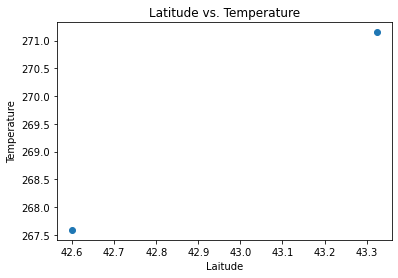

In [30]:
# I KNOW THE TEMP VALUES ARE ODD AND PROBABLY NEED TO BE UPDATED
# BUT THAT IS THE VALUE IN THE JSON SO I WILL LEAVE IT FOR NOW

# Create Latitude vs. Temperature scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Temperature"])

# Set the title and x and y labels of the plot
plt.title("Latitude vs. Temperature")
plt.xlabel("Laitude")
plt.ylabel("Temperature")

# Best practice to use plt.show()
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression